Cross-Validation

In [49]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from cross_validation import cross_validation
from OLS_Ridge import generate_data
from sklearn.preprocessing import PolynomialFeatures

In [50]:
def run_experiment_CV(x, y, degrees, lmbda=0, lass=False, n_folds=5, LOO=False):
    results = []
    if LOO:
        n_folds = len(x)
        for fold in range(n_folds):
            fold_result = cross_validation(x, y, degrees=degrees, lmbda=lmbda, eta=0.1, lass=lass, n_folds=fold, LOO=LOO, GD_meth="GDM")
            fold_result["K-Folds"] = fold
            results.append(fold_result)

    else:
        for fold in n_folds:
            fold_result = cross_validation(x, y, degrees=degrees, lmbda=lmbda, eta=0.1, lass=lass, n_folds=fold, GD_meth="GDM")
            
            fold_result["K-Folds"] = fold
            results.append(fold_result)
    
    return results

In [51]:
n = 50

# Generate data
x, y = generate_data(n, seed=42)

# Number of folds
n_folds = list(range(3, 21))

In [52]:
res_CV_OLS = run_experiment_CV(x, y, degrees=8, lmbda=0, lass=False, n_folds=n_folds, LOO=False)

In [53]:
res_CV_Ridge = run_experiment_CV(x, y, degrees=8, lmbda=0.00001, lass=False, n_folds=n_folds, LOO=False)

In [54]:
res_CV_Lasso = run_experiment_CV(x, y, degrees=8, lmbda=0.001, lass=True, n_folds=n_folds, LOO=False)

Plotting the MSE of the different methods using cross-validation

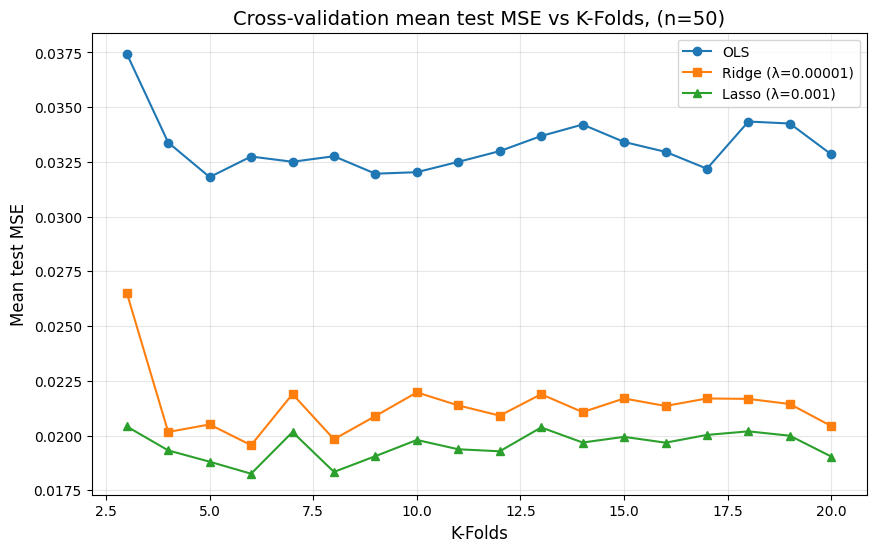

OLS mean MSE 0.033221421030544825
Ridge mean MSE 0.02138158206455872
Lasso mean MSE 0.01954063426602403


In [55]:
plt.figure(figsize=(10, 6))
plt.plot([r["K-Folds"] for r in res_CV_OLS], [r["test_mse"] for r in res_CV_OLS], 'o-', label='OLS')
plt.plot([r["K-Folds"] for r in res_CV_Ridge], [r["test_mse"] for r in res_CV_Ridge], 's-', label='Ridge (λ=0.00001)')
plt.plot([r["K-Folds"] for r in res_CV_Lasso], [r["test_mse"] for r in res_CV_Lasso], '^-', label='Lasso (λ=0.001)')
plt.xlabel("K-Folds", fontsize=12)
plt.ylabel("Mean test MSE", fontsize=12)
plt.title("Cross-validation mean test MSE vs K-Folds, (n=50)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("OLS mean MSE", np.mean([r["test_mse"] for r in res_CV_OLS]))
print("Ridge mean MSE", np.mean([r["test_mse"] for r in res_CV_Ridge]))
print("Lasso mean MSE", np.mean([r["test_mse"] for r in res_CV_Lasso]))

GDM\
OLS mean MSE 0.041633205512785154\
Ridge mean MSE 0.029935910377153947\
Lasso mean MSE 0.030491671257535435

In [56]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

poly_features = PolynomialFeatures(8)
X = poly_features.fit_transform(x)


KeyError: 'theta'

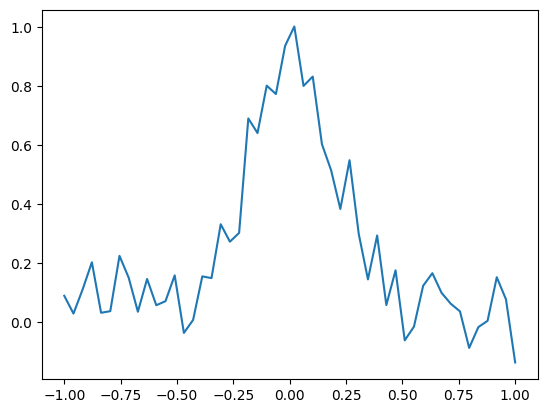

In [57]:
plt.plot(x, y)
plt.plot(x, (np.mean([r["theta"] for r in res_CV_OLS]) @ X))